# Titanic Survival Analysis 🚢

Import Required Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Set Plot Style

In [2]:
sns.set(style="whitegrid")

Load Dataset

In [3]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)

train.head()

Train shape: (891, 12)
Test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check Missing Values in Dataset

In [4]:
print("Missing values before cleaning:")
print(train.isnull().sum)

Missing values before cleaning:
<bound method NDFrame._add_numeric_operations.<locals>.sum of      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        Fals

Data Cleaning

In [5]:
train['Age'].fillna(train['Age'].median(), inplace = True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

train.drop(columns=['Cabin'], inplace=True)

print("Missing values after cleaning")
print(train.isnull().sum())

Missing values after cleaning
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Exploratory Data Analysis (EDA)

Overall Survival Rate

In [6]:
survival_rate = train['Survived'].mean()
print("Overall Survival Rate:", round(survival_rate*100,2), "%")

Overall Survival Rate: 38.38 %


Survival by Gender

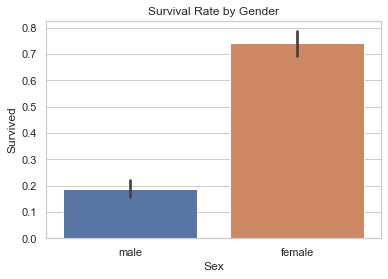

In [7]:
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=train)
plt.title("Survival Rate by Gender")
plt.savefig("../images/survival_gender.png")
plt.show()

Survival by Passenger Class

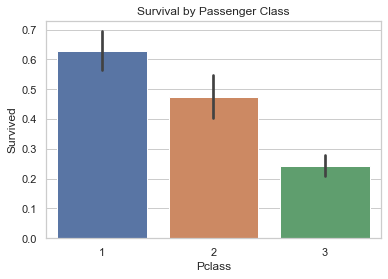

In [8]:
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=train)
plt.title("Survival by Passenger Class")
plt.savefig("../images/survival_class.png")
plt.show()

Age Distribution

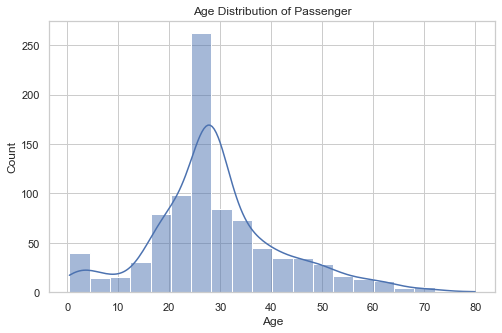

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(train['Age'], bins=20, kde=True)
plt.title("Age Distribution of Passenger")
plt.savefig("../images/age_distribution.png")
plt.show()

Survival by Age

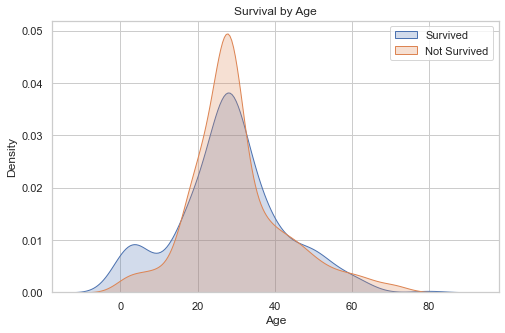

In [10]:
plt.figure(figsize=(8,5))
sns.kdeplot(train.loc[train['Survived']==1, "Age"], shade=True, label="Survived")
sns.kdeplot(train.loc[train['Survived']==0, 'Age'], shade=True, label="Not Survived")
plt.title("Survival by Age")
plt.savefig("../images/survival_by_age.png")
plt.legend()
plt.show()

Feature Engineering

Family Size

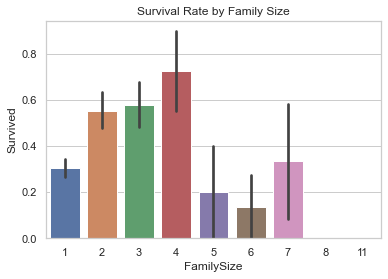

In [11]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

train['isAlone'] = (train['FamilySize']==1).astype(int)

plt.figure(figsize=(6,4))
sns.barplot(x="FamilySize", y="Survived", data=train)
plt.title("Survival Rate by Family Size")
plt.savefig("../images/survival_family.png")
plt.show()

Insights

In [12]:
print("""
📌 Key Insights:
1. Women had much higher survival rate than men.
2. Passengers in 1st Class survived more than 3rd Class.
3. Children and younger passengers had better survival chances.
4. People traveling alone had lower survival chances.
""")


📌 Key Insights:
1. Women had much higher survival rate than men.
2. Passengers in 1st Class survived more than 3rd Class.
3. Children and younger passengers had better survival chances.
4. People traveling alone had lower survival chances.

